# House Prices - Advanced Regression Techniques

In [1]:
# Import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [11]:
df["MoSold"]

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64

In [12]:
pd.crosstab(df["MoSold"],df["YrSold"])

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,10,13,13,12,10
2,9,8,10,10,15
3,25,23,18,19,21
4,27,23,26,26,39
5,38,43,38,37,48
6,48,59,51,59,36
7,67,51,49,61,6
8,23,40,29,30,0
9,15,11,17,20,0


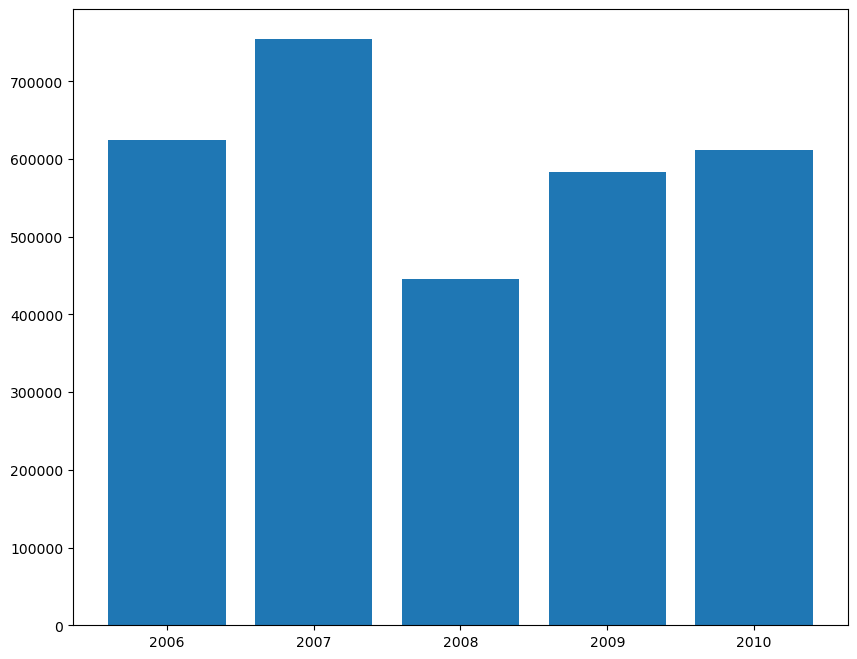

In [16]:
fig, ax = plt.subplots(figsize = (10,8))
ax = plt.bar(df["YrSold"],df["SalePrice"])

<Axes: >

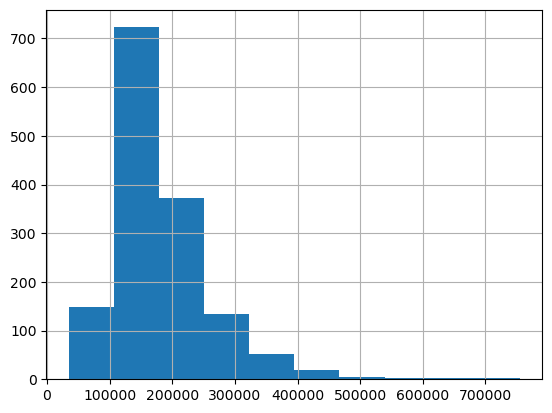

In [17]:
df["SalePrice"].hist()

<BarContainer object of 1460 artists>

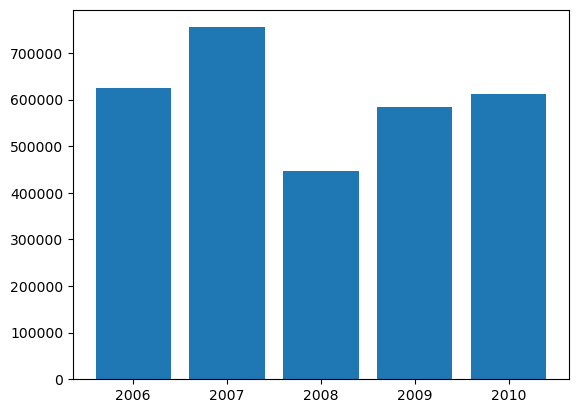

In [19]:
plt.bar(df["YrSold"],df["SalePrice"])

In [21]:
df.sort_values(by='YrSold',inplace=True)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000


In [23]:
df_tmp = df.copy()

In [24]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000


In [26]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [27]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category')

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   int64

In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype('category')

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   int64

In [31]:
df_tmp.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
for label, content in df_tmp.items():
    if content.isnull().sum():
        print (label)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [35]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            df_tmp[label] = content.fillna(content.median())

In [36]:
for label, content in df_tmp.items():
    if content.isnull().sum():
        print (label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [40]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes+1

In [41]:
for label, content in df_tmp.items():
    if content.isnull().sum():
        print (label)

In [42]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,4,65.0,7153,2,0,4,4,1,...,0,0,0,0,0,7,2006,9,5,175900
1219,1220,160,5,21.0,1680,2,0,4,4,1,...,0,0,0,0,0,4,2006,9,1,91500
281,282,20,2,60.0,7200,2,2,4,4,1,...,0,0,0,0,0,5,2006,7,6,185000
569,570,90,4,69.0,7032,2,0,1,4,1,...,0,0,0,0,0,12,2006,9,5,135960
1220,1221,20,4,66.0,7800,2,0,1,4,1,...,0,0,0,0,0,11,2006,9,1,115000


In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [44]:
from sklearn.model_selection import train_test_split
X = df_tmp.drop("SalePrice",axis=1)
Y = df_tmp["SalePrice"]
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [45]:
model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
model.score(X_test,Y_test)

0.8370078563158075

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
grid = {"max_depth": np.arange(1,50,2),
       "max_features": ["sqrt","log2"],
       "min_samples_leaf": np.arange(1,20,2),
       "min_samples_split":np.arange(1,20,2),
       "n_estimators": np.arange(1,50,2)}

rs_model = RandomizedSearchCV(estimator=model,param_distributions=grid,cv=5,n_iter=10,verbose=True)
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regression-techniques/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regression-techniques/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regression-techniques/env/lib/python3.13/site

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': array([ 1, 3..., 45, 47, 49]), 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [54]:
rs_model.score(X_test,Y_test)

0.8082832022503676

In [56]:
rs_model.best_params_

{'n_estimators': np.int64(43),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(3),
 'max_features': 'sqrt',
 'max_depth': np.int64(41)}

In [57]:
grid2 = {"n_estimators": np.arange(40,50,1),
        "min_samples_split":np.arange(2,10,1),
        "min_samples_leaf":np.arange(2,10,1),
        "max_features":["auto","sqrt","log2"],
        "max_depth":np.arange(40,50,2)}

In [59]:
gs_model = GridSearchCV(estimator=model,param_grid=grid2,cv=5,verbose=1,n_jobs=-1)
gs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regression-techniques/env/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regression-techniques/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
16000 fits failed out of a total of 48000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10289 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/swarup/Desktop/Machine_learning/house-prices-advanced-regre

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': array([40, 42, 44, 46, 48]), 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': array([2, 3, ..., 6, 7, 8, 9]), 'min_samples_split': array([2, 3, ..., 6, 7, 8, 9]), ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(47)


In [60]:
gs_model.best_params_

{'max_depth': np.int64(48),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(2),
 'min_samples_split': np.int64(5),
 'n_estimators': np.int64(47)}

In [61]:
gs_model.score(X_test,Y_test)

0.8224573871152575

In [62]:
from sklearn.metrics import root_mean_squared_error

In [63]:
y_preds = model.predict(X_test)
model_eval = root_mean_squared_error(Y_test,y_preds)

In [64]:
model_eval

34041.78845709536

In [66]:
y_preds = rs_model.predict(X_test)
rsmodel_eval = root_mean_squared_error(Y_test,y_preds)
rsmodel_eval

36919.78097521909

In [67]:
y_preds = gs_model.predict(X_test)
gsmodel_eval = root_mean_squared_error(Y_test,y_preds)
gsmodel_eval

35528.783395881575